In [131]:
%%capture
%run TGF_basic_functions.ipynb

#from basic_functions import *

import scipy.io # import .mat
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


from skfeature.function.statistical_based import f_score
from skfeature.function.information_theoretical_based import MRMR

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from datetime import timedelta

## Load dataset

In [2]:
# Load dataset ALLAML
ds = scipy.io.loadmat("ALLAML.mat")
# Features -> X
X = ds['X']
# Class labels -> y
y = ds['Y'][:,0]
# Shape of the data array
n_samples, n_features = np.shape(X)
# Shape of the class labels
n_labels = np.shape(y)

### FS methods

In [3]:
# total features to select
num_fea = n_features
# Scoring
scoring=['accuracy','precision','recall']
# fs methods
fs_method = ['f_score','mrmr','svm_f','svm_b']

### ML models

In [4]:
# Models
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_DTC = DecisionTreeClassifier()
clf_SVC = SVC()
models = [clf_KNN,clf_DTC,clf_SVC]
# Scoring
scoring=['accuracy','precision','recall']

### CV

In [5]:
# cross validation method
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=32)

# Filter methods

## F_score

In [6]:
startTime = time.time()
idx_f_score = select_FS_method(fs_method[0],X,y,num_fea)
endTime = time.time()
timeUsed = timedelta(seconds=endTime-startTime)
print('- Time used in FS f_score method: ' + str(timeUsed))

- Time used in FS f_score method: 0:00:00.015009


In [7]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,num_fea,scoring,idx_f_score)

         - Time used in KNeighbors 0:29:28.405672
         - Time used in DecisionTr 0:17:07.772784
         - Time used in SVC(C=1.0, 0:29:47.006431
------- Time used in FOLD 0:       1:16:23.184887
         - Time used in KNeighbors 0:29:23.821775
         - Time used in DecisionTr 0:15:18.610123
         - Time used in SVC(C=1.0, 0:29:47.369061
------- Time used in FOLD 1:       1:14:29.800959
         - Time used in KNeighbors 0:30:22.369062
         - Time used in DecisionTr 0:15:05.734127
         - Time used in SVC(C=1.0, 0:30:35.232996
------- Time used in FOLD 2:       1:16:03.341184
         - Time used in KNeighbors 0:30:03.917842
         - Time used in DecisionTr 0:14:33.089130
         - Time used in SVC(C=1.0, 0:31:54.315552
------- Time used in FOLD 3:       1:16:31.322525
         - Time used in KNeighbors 0:30:25.622165
         - Time used in DecisionTr 0:13:07.355622
         - Time used in SVC(C=1.0, 0:30:46.852808
------- Time used in FOLD 4:       1:14:19.840587


In [8]:
fmyKNN = formatArray(knnResult)
fmyDTC = formatArray(dtcResult)
fmySVC = formatArray(svcResult)

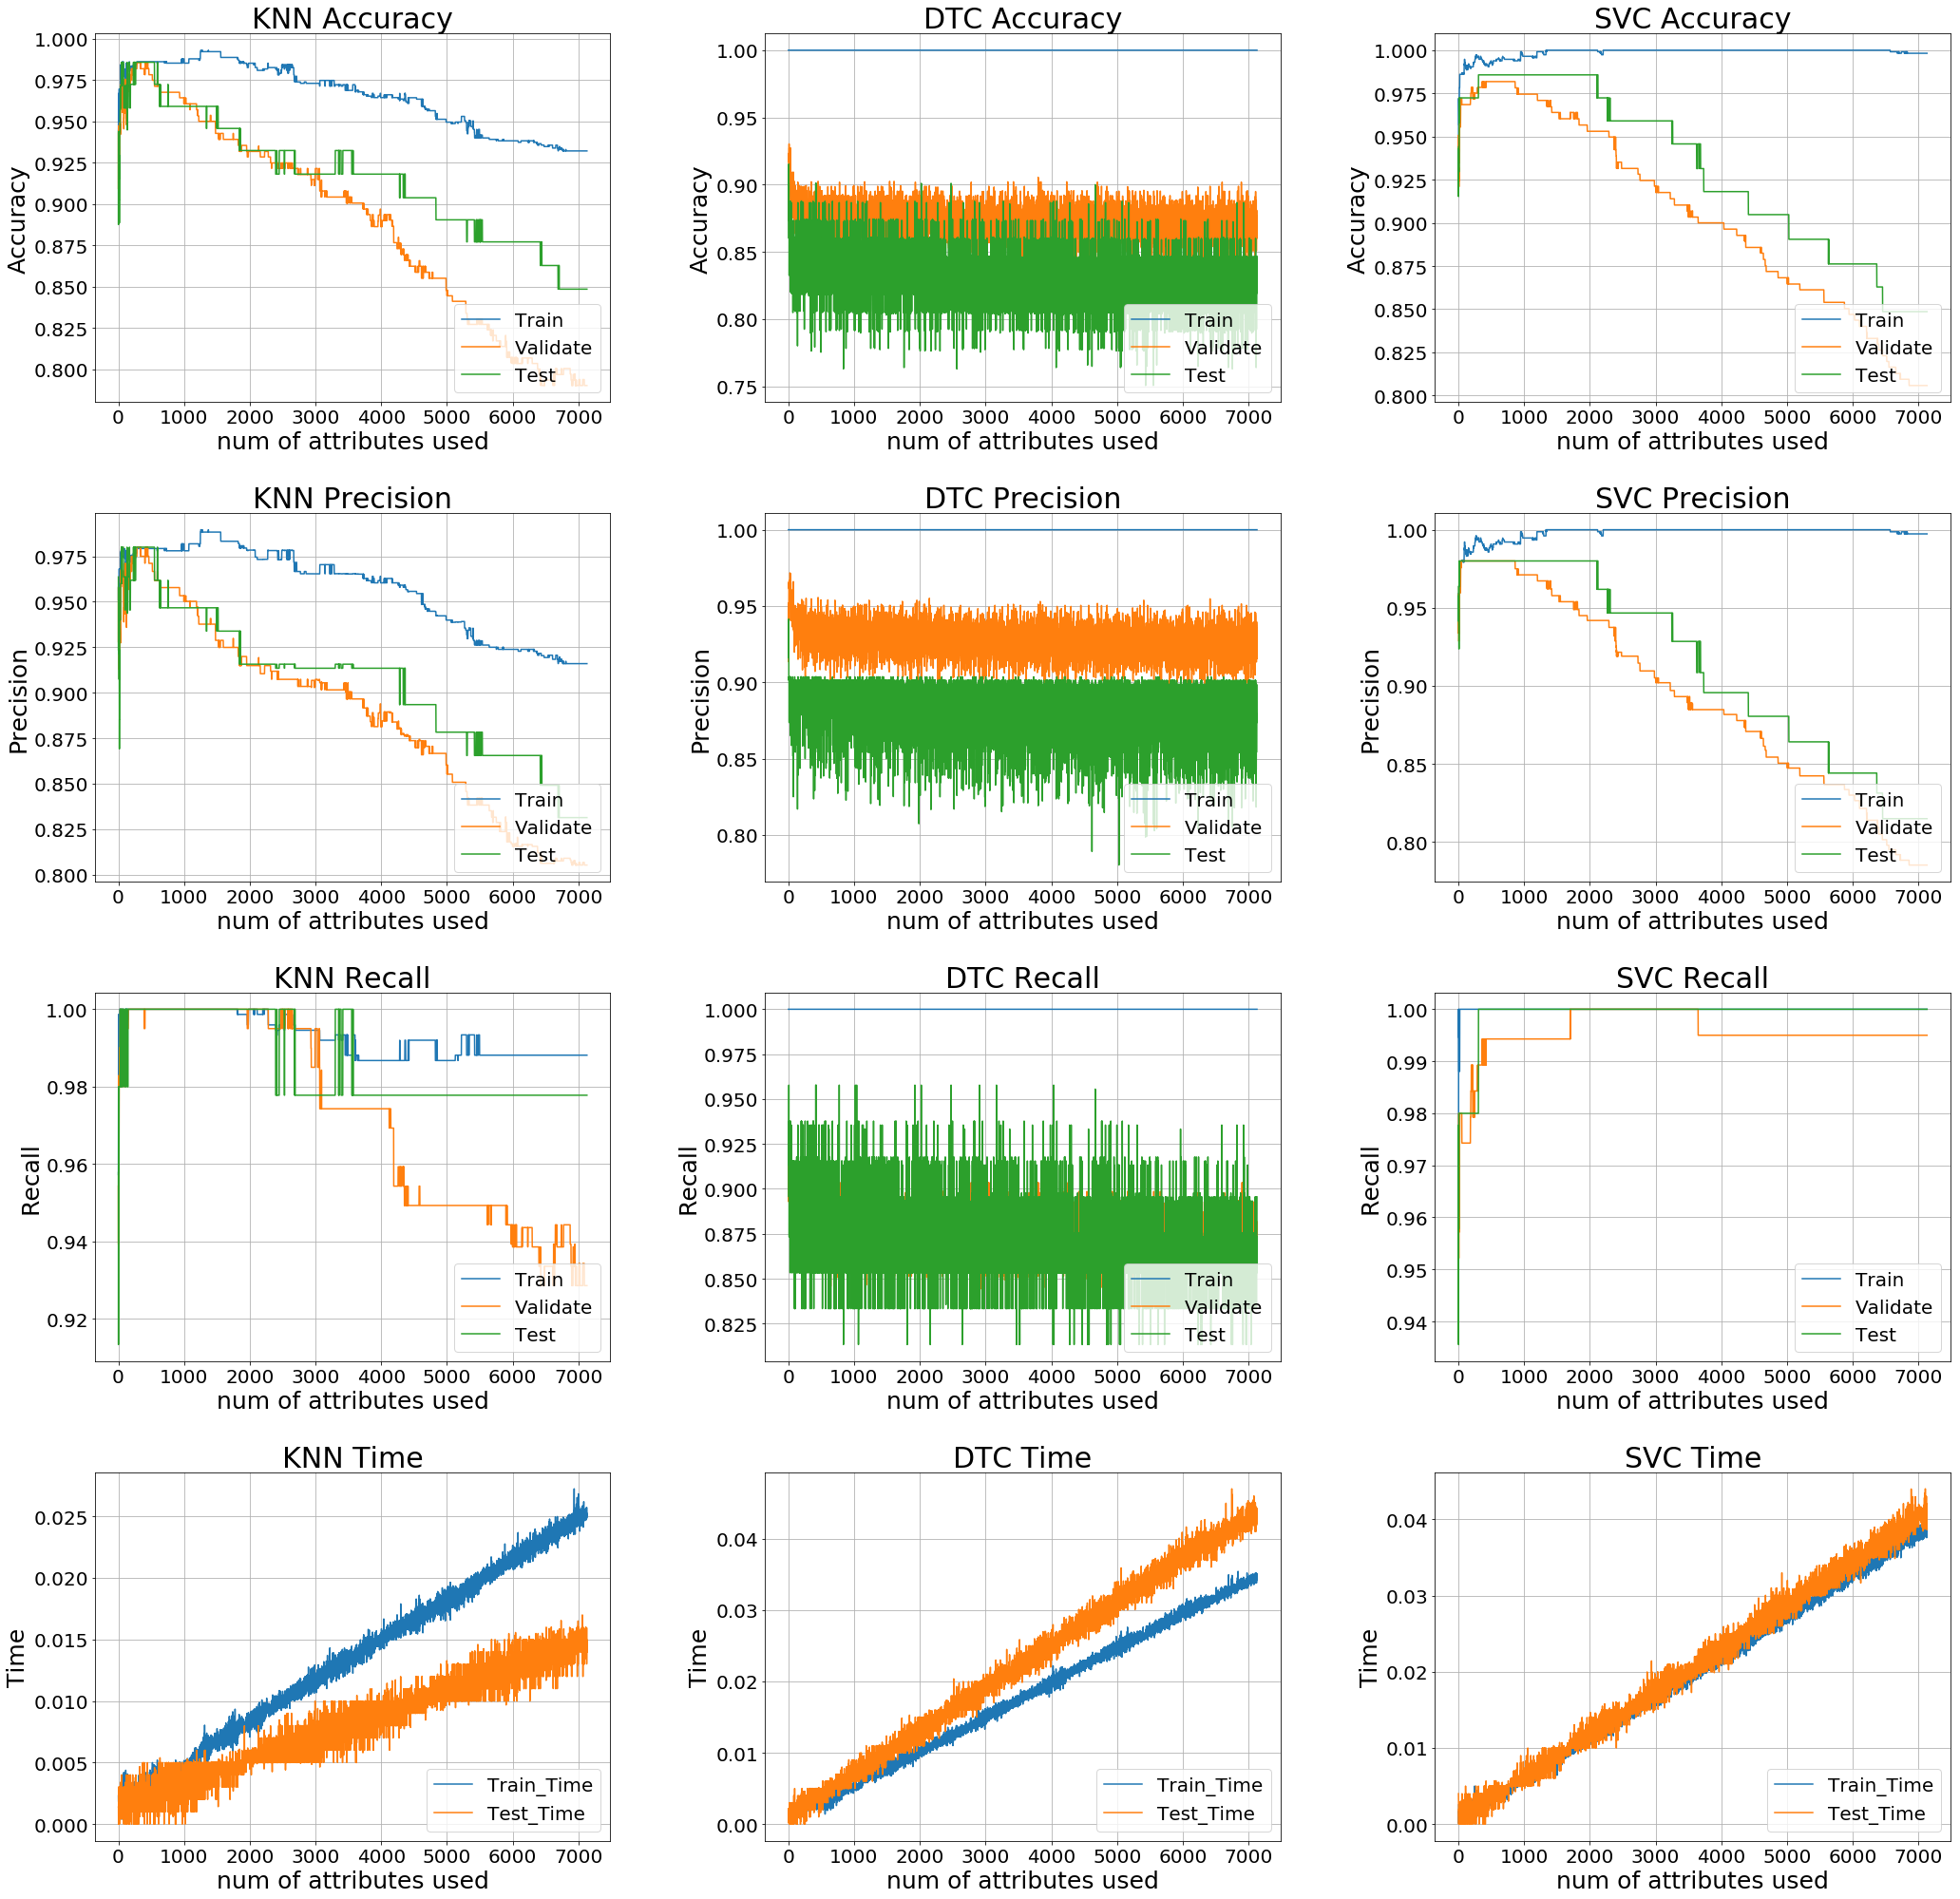

In [9]:
plotModel2(fmyKNN,fmyDTC,fmySVC,(35,35),0.3,0.3,20)

In [10]:
printTotalBestResult(fmyKNN,fmyDTC,fmySVC)

KNN
- Max Accuracy:   0.9857142857142858 using: 45 attributes.
- Max Precission: 0.9800000000000001 using: 45 attributes.
- Max Recall:     1.0 using: 27 attributes.

DTC
- Max Accuracy:   0.9152380952380952 using: 6 attributes.
- Max Precission: 0.9414141414141415 using: 6 attributes.
- Max Recall:     0.9577777777777777 using: 8 attributes.

SVC
- Max Accuracy:   0.9857142857142858 using: 305 attributes.
- Max Precission: 0.9800000000000001 using: 13 attributes.
- Max Recall:     1.0 using: 305 attributes.


### mRMR

In [11]:
startTime = time.time()
idx_mrmr = select_FS_method(fs_method[1],X,y,num_fea)
endTime = time.time()
timeUsed = timedelta(seconds=endTime-startTime)
print('- Time used in FS f_score method: ' + str(timeUsed))

- Time used in FS f_score method: 4:03:49.458157


In [12]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,num_fea,scoring,idx_mrmr)

         - Time used in KNeighbors 0:29:23.004328
         - Time used in DecisionTr 0:17:50.196973
         - Time used in SVC(C=1.0, 0:32:00.328736
------- Time used in FOLD 0:       1:19:13.535002
         - Time used in KNeighbors 0:30:53.238223
         - Time used in DecisionTr 0:16:11.825289
         - Time used in SVC(C=1.0, 0:32:15.989058
------- Time used in FOLD 1:       1:19:21.052571
         - Time used in KNeighbors 0:32:56.352718
         - Time used in DecisionTr 0:17:30.461285
         - Time used in SVC(C=1.0, 0:34:01.024318
------- Time used in FOLD 2:       1:24:27.843287
         - Time used in KNeighbors 0:32:17.326963
         - Time used in DecisionTr 0:16:34.803261
         - Time used in SVC(C=1.0, 0:39:22.699220
------- Time used in FOLD 3:       1:28:14.836405
         - Time used in KNeighbors 0:43:12.872652
         - Time used in DecisionTr 0:26:07.355250
         - Time used in SVC(C=1.0, 0:37:00.338204
------- Time used in FOLD 4:       1:46:20.576059


In [13]:
mmyKNN = formatArray(knnResult)
mmyDTC = formatArray(dtcResult)
mmySVC = formatArray(svcResult)

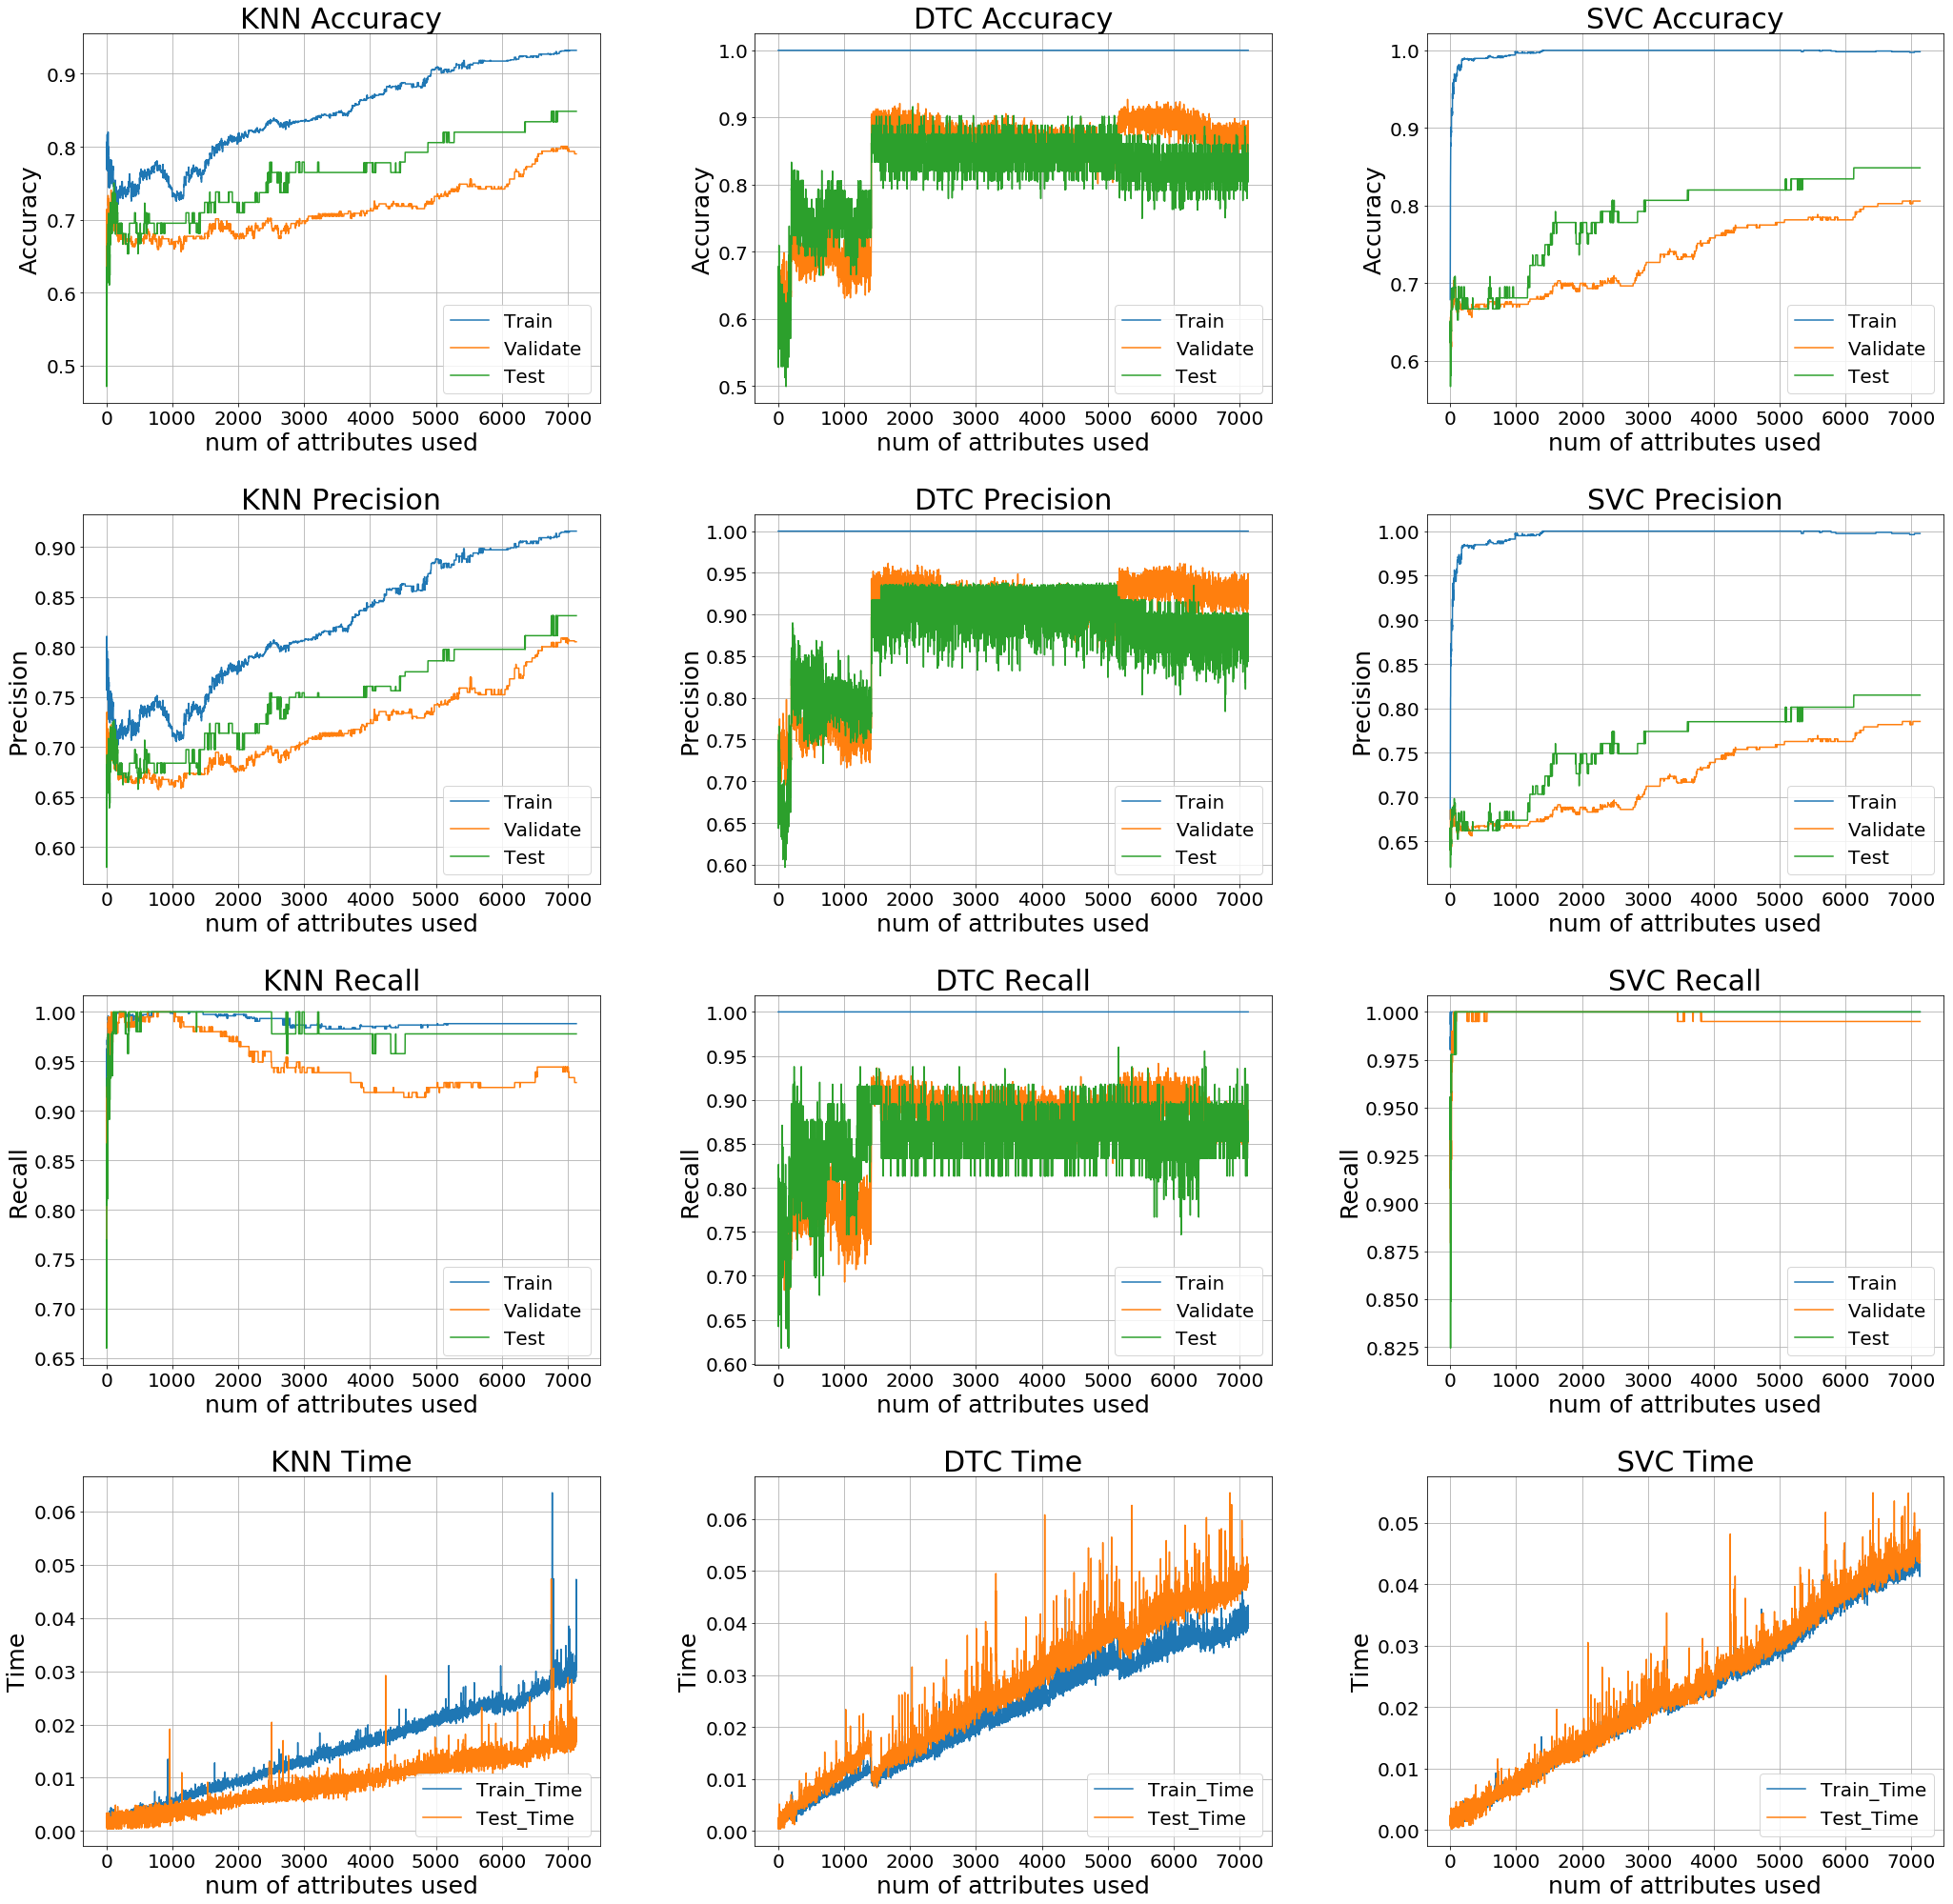

In [14]:
plotModel2(mmyKNN,mmyDTC,mmySVC,(35,35),0.3,0.3,20)

In [15]:
printTotalBestResult(mmyKNN,mmyDTC,mmySVC)

KNN
- Max Accuracy:   0.8485714285714285 using: 6749 attributes.
- Max Precission: 0.8313286713286713 using: 6749 attributes.
- Max Recall:     1.0 using: 104 attributes.

DTC
- Max Accuracy:   0.9161904761904761 using: 2040 attributes.
- Max Precission: 0.9377777777777778 using: 4875 attributes.
- Max Recall:     0.96 using: 5164 attributes.

SVC
- Max Accuracy:   0.8485714285714285 using: 6123 attributes.
- Max Precission: 0.8149650349650349 using: 6123 attributes.
- Max Recall:     1.0 using: 71 attributes.


# Wrapper

### SVC_Forward

In [16]:
# Num features to use: 1000
num_fea_svc_f = 1000

In [17]:
startTime = time.time()
idx_svc_b = select_FS_method(fs_method[2],X,y,num_fea_svc_f)
endTime = time.time()
timeUsed = timedelta(seconds=endTime-startTime)
print('- Time used in FS SVC_f method: ' + str(timeUsed))

[Parallel(n_jobs=1)]: Done 7129 out of 7129 | elapsed:    4.9s finished
Features: 1/1000[Parallel(n_jobs=1)]: Done 7128 out of 7128 | elapsed:    4.0s finished
Features: 2/1000[Parallel(n_jobs=1)]: Done 7127 out of 7127 | elapsed:    4.0s finished
Features: 3/1000[Parallel(n_jobs=1)]: Done 7126 out of 7126 | elapsed:    4.1s finished
Features: 4/1000[Parallel(n_jobs=1)]: Done 7125 out of 7125 | elapsed:    4.4s finished
Features: 5/1000[Parallel(n_jobs=1)]: Done 7124 out of 7124 | elapsed:    4.6s finished
Features: 6/1000[Parallel(n_jobs=1)]: Done 7123 out of 7123 | elapsed:    4.7s finished
Features: 7/1000[Parallel(n_jobs=1)]: Done 7122 out of 7122 | elapsed:    4.8s finished
Features: 8/1000[Parallel(n_jobs=1)]: Done 7121 out of 7121 | elapsed:    5.0s finished
Features: 9/1000[Parallel(n_jobs=1)]: Done 7120 out of 7120 | elapsed:    5.1s finished
Features: 10/1000[Parallel(n_jobs=1)]: Done 7119 out of 7119 | elapsed:    5.4s finished
Features: 11/1000[Parallel(n_jobs=1)]: Done 711

Features: 93/1000[Parallel(n_jobs=1)]: Done 7036 out of 7036 | elapsed:   12.1s finished
Features: 94/1000[Parallel(n_jobs=1)]: Done 7035 out of 7035 | elapsed:   12.3s finished
Features: 95/1000[Parallel(n_jobs=1)]: Done 7034 out of 7034 | elapsed:   12.4s finished
Features: 96/1000[Parallel(n_jobs=1)]: Done 7033 out of 7033 | elapsed:   12.4s finished
Features: 97/1000[Parallel(n_jobs=1)]: Done 7032 out of 7032 | elapsed:   12.8s finished
Features: 98/1000[Parallel(n_jobs=1)]: Done 7031 out of 7031 | elapsed:   12.8s finished
Features: 99/1000[Parallel(n_jobs=1)]: Done 7030 out of 7030 | elapsed:   12.7s finished
Features: 100/1000[Parallel(n_jobs=1)]: Done 7029 out of 7029 | elapsed:   12.8s finished
Features: 101/1000[Parallel(n_jobs=1)]: Done 7028 out of 7028 | elapsed:   12.9s finished
Features: 102/1000[Parallel(n_jobs=1)]: Done 7027 out of 7027 | elapsed:   13.0s finished
Features: 103/1000[Parallel(n_jobs=1)]: Done 7026 out of 7026 | elapsed:   13.1s finished
Features: 104/100

Features: 275/1000[Parallel(n_jobs=1)]: Done 6854 out of 6854 | elapsed:   28.1s finished
Features: 276/1000[Parallel(n_jobs=1)]: Done 6853 out of 6853 | elapsed:   28.2s finished
Features: 277/1000[Parallel(n_jobs=1)]: Done 6852 out of 6852 | elapsed:   28.3s finished
Features: 278/1000[Parallel(n_jobs=1)]: Done 6851 out of 6851 | elapsed:   28.4s finished
Features: 279/1000[Parallel(n_jobs=1)]: Done 6850 out of 6850 | elapsed:   28.6s finished
Features: 280/1000[Parallel(n_jobs=1)]: Done 6849 out of 6849 | elapsed:   28.5s finished
Features: 281/1000[Parallel(n_jobs=1)]: Done 6848 out of 6848 | elapsed:   28.5s finished
Features: 282/1000[Parallel(n_jobs=1)]: Done 6847 out of 6847 | elapsed:   28.6s finished
Features: 283/1000[Parallel(n_jobs=1)]: Done 6846 out of 6846 | elapsed:   28.6s finished
Features: 284/1000[Parallel(n_jobs=1)]: Done 6845 out of 6845 | elapsed:   28.8s finished
Features: 285/1000[Parallel(n_jobs=1)]: Done 6844 out of 6844 | elapsed:   29.7s finished
Features: 

Features: 457/1000[Parallel(n_jobs=1)]: Done 6672 out of 6672 | elapsed:   44.0s finished
Features: 458/1000[Parallel(n_jobs=1)]: Done 6671 out of 6671 | elapsed:   43.2s finished
Features: 459/1000[Parallel(n_jobs=1)]: Done 6670 out of 6670 | elapsed:   43.6s finished
Features: 460/1000[Parallel(n_jobs=1)]: Done 6669 out of 6669 | elapsed:   43.5s finished
Features: 461/1000[Parallel(n_jobs=1)]: Done 6668 out of 6668 | elapsed:   43.4s finished
Features: 462/1000[Parallel(n_jobs=1)]: Done 6667 out of 6667 | elapsed:   43.6s finished
Features: 463/1000[Parallel(n_jobs=1)]: Done 6666 out of 6666 | elapsed:   43.7s finished
Features: 464/1000[Parallel(n_jobs=1)]: Done 6665 out of 6665 | elapsed:   43.9s finished
Features: 465/1000[Parallel(n_jobs=1)]: Done 6664 out of 6664 | elapsed:   43.8s finished
Features: 466/1000[Parallel(n_jobs=1)]: Done 6663 out of 6663 | elapsed:   43.8s finished
Features: 467/1000[Parallel(n_jobs=1)]: Done 6662 out of 6662 | elapsed:   44.0s finished
Features: 

Features: 639/1000[Parallel(n_jobs=1)]: Done 6490 out of 6490 | elapsed:   60.0s finished
Features: 640/1000[Parallel(n_jobs=1)]: Done 6489 out of 6489 | elapsed:   59.6s finished
Features: 641/1000[Parallel(n_jobs=1)]: Done 6488 out of 6488 | elapsed:   58.8s finished
Features: 642/1000[Parallel(n_jobs=1)]: Done 6487 out of 6487 | elapsed:   58.7s finished
Features: 643/1000[Parallel(n_jobs=1)]: Done 6486 out of 6486 | elapsed:   58.1s finished
Features: 644/1000[Parallel(n_jobs=1)]: Done 6485 out of 6485 | elapsed:   58.2s finished
Features: 645/1000[Parallel(n_jobs=1)]: Done 6484 out of 6484 | elapsed:   58.0s finished
Features: 646/1000[Parallel(n_jobs=1)]: Done 6483 out of 6483 | elapsed:   58.2s finished
Features: 647/1000[Parallel(n_jobs=1)]: Done 6482 out of 6482 | elapsed:   58.3s finished
Features: 648/1000[Parallel(n_jobs=1)]: Done 6481 out of 6481 | elapsed:   58.4s finished
Features: 649/1000[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed:   58.3s finished
Features: 

Features: 821/1000[Parallel(n_jobs=1)]: Done 6308 out of 6308 | elapsed:  1.2min finished
Features: 822/1000[Parallel(n_jobs=1)]: Done 6307 out of 6307 | elapsed:  1.2min finished
Features: 823/1000[Parallel(n_jobs=1)]: Done 6306 out of 6306 | elapsed:  1.2min finished
Features: 824/1000[Parallel(n_jobs=1)]: Done 6305 out of 6305 | elapsed:  1.2min finished
Features: 825/1000[Parallel(n_jobs=1)]: Done 6304 out of 6304 | elapsed:  1.2min finished
Features: 826/1000[Parallel(n_jobs=1)]: Done 6303 out of 6303 | elapsed:  1.2min finished
Features: 827/1000[Parallel(n_jobs=1)]: Done 6302 out of 6302 | elapsed:  1.2min finished
Features: 828/1000[Parallel(n_jobs=1)]: Done 6301 out of 6301 | elapsed:  1.2min finished
Features: 829/1000[Parallel(n_jobs=1)]: Done 6300 out of 6300 | elapsed:  1.2min finished
Features: 830/1000[Parallel(n_jobs=1)]: Done 6299 out of 6299 | elapsed:  1.2min finished
Features: 831/1000[Parallel(n_jobs=1)]: Done 6298 out of 6298 | elapsed:  1.2min finished
Features: 

- Time used in FS SVC_f method: 13:00:12.184134


In [18]:
knnResult,dtcResult,svcResult,cMatrix = model_result2(X,y,skf,models,num_fea_svc_f,scoring,idx_svc_b)

         - Time used in KNeighbors 0:00:54.891291
         - Time used in DecisionTr 0:00:37.179631
         - Time used in SVC(C=1.0, 0:00:49.444849
------- Time used in FOLD 0:       0:02:21.521759
         - Time used in KNeighbors 0:00:54.970117
         - Time used in DecisionTr 0:00:38.764390
         - Time used in SVC(C=1.0, 0:00:49.560513
------- Time used in FOLD 1:       0:02:23.298011
         - Time used in KNeighbors 0:00:55.919573
         - Time used in DecisionTr 0:00:36.853506
         - Time used in SVC(C=1.0, 0:00:50.613753
------- Time used in FOLD 2:       0:02:23.391788
         - Time used in KNeighbors 0:00:55.654222
         - Time used in DecisionTr 0:00:37.303329
         - Time used in SVC(C=1.0, 0:00:50.764328
------- Time used in FOLD 3:       0:02:23.725892
         - Time used in KNeighbors 0:00:55.811861
         - Time used in DecisionTr 0:00:35.829266
         - Time used in SVC(C=1.0, 0:00:50.666588
------- Time used in FOLD 4:       0:02:22.312626


In [19]:
svcFmyKNN = formatArray(knnResult)
svcFmyDTC = formatArray(dtcResult)
svcFmySVC = formatArray(svcResult)

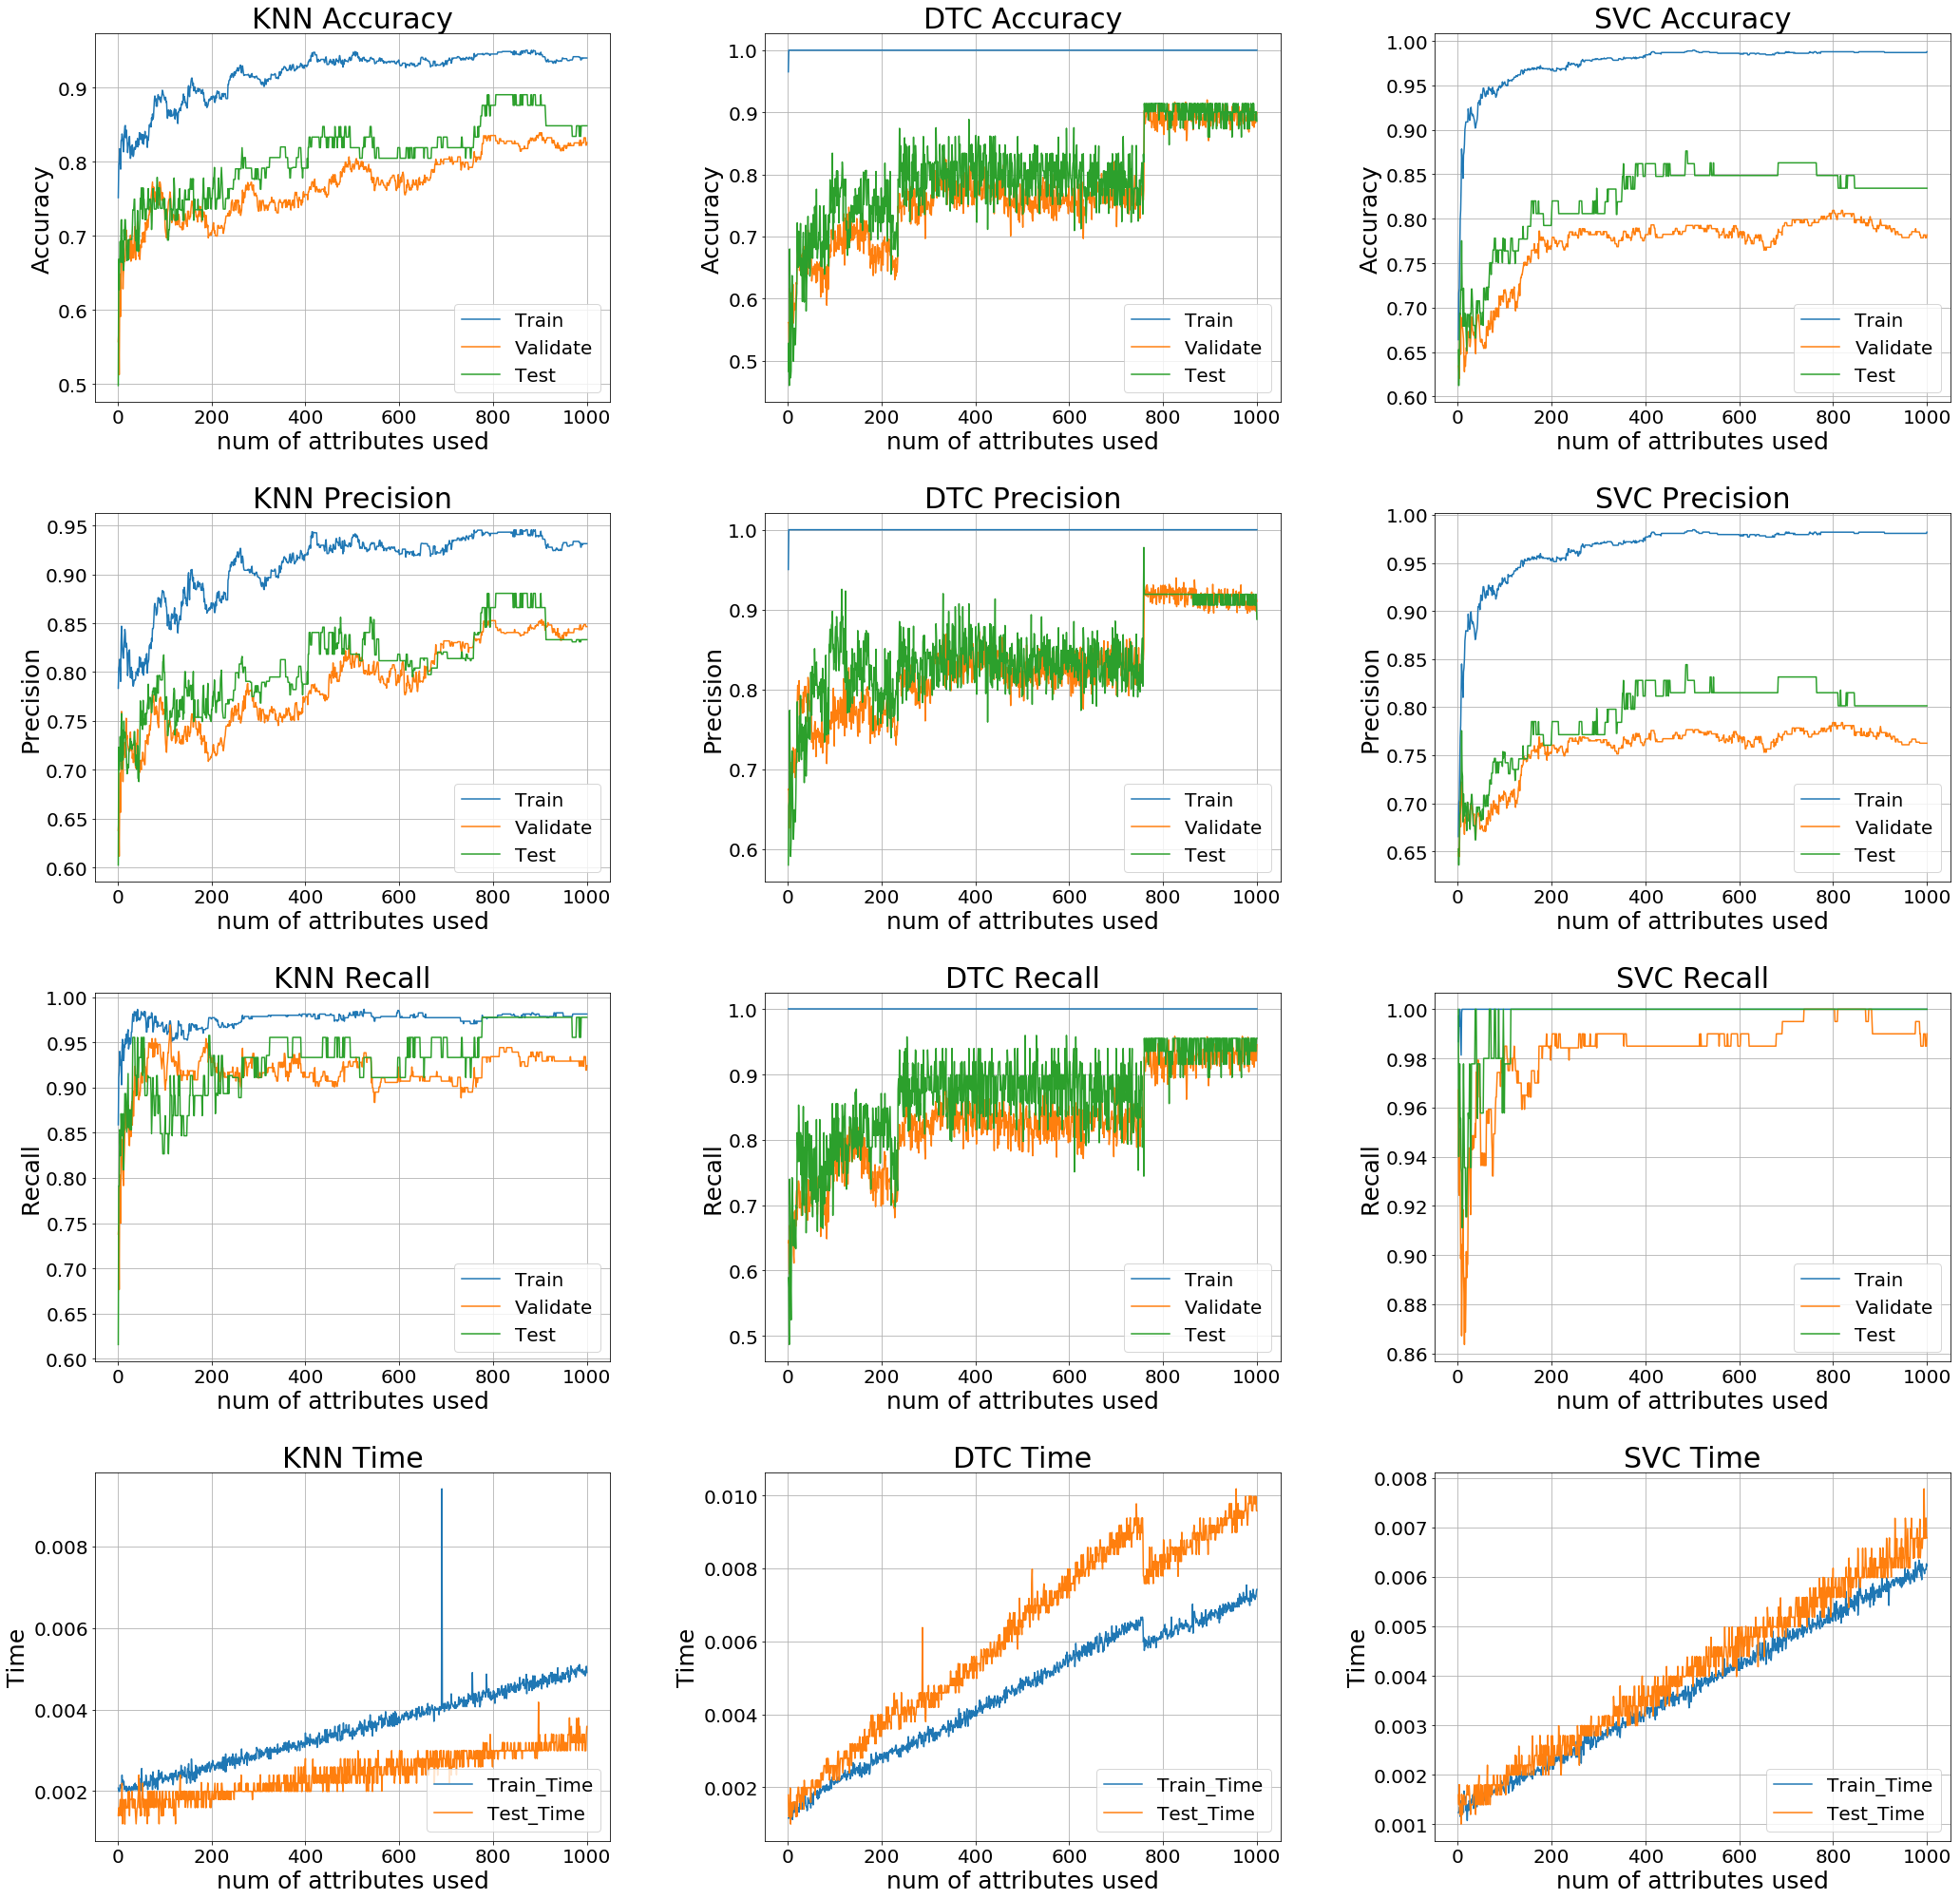

In [20]:
plotModel2(svcFmyKNN,svcFmyDTC,svcFmySVC,(35,35),0.3,0.3,20)

In [21]:
printTotalBestResult(svcFmyKNN,svcFmyDTC,svcFmySVC)

KNN
- Max Accuracy:   0.8904761904761905 using: 788 attributes.
- Max Precission: 0.8805128205128205 using: 788 attributes.
- Max Recall:     0.9777777777777779 using: 777 attributes.

DTC
- Max Accuracy:   0.9142857142857143 using: 760 attributes.
- Max Precission: 0.9777777777777779 using: 759 attributes.
- Max Recall:     0.96 using: 506 attributes.

SVC
- Max Accuracy:   0.8761904761904761 using: 486 attributes.
- Max Precission: 0.844149184149184 using: 486 attributes.
- Max Recall:     1.0 using: 1 attributes.
